In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!unzip train.csv

Archive:  train.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df=pd.read_csv('./train.csv')

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#Checking whether the datset is balanced or not
df['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [ ]:
df.shape

(20800, 5)

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(18285, 5)

In [ ]:
X=df.drop('label',axis=1)
Y=df['label']

In [ ]:
X.shape,Y.shape

((18285, 4), (18285,))

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
#vocubalry size
voc=5000

**One Hot Representation**

In [ ]:
messages=X.copy()

In [ ]:
messages.reset_index(inplace=True)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Dataset preprocessing
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
  review=re.sub('[^a-zA-Z]',' ',messages['title'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [ ]:
#one hot representation
onehot_rep=[one_hot(word,voc)for word in corpus]

In [ ]:
onehot_rep[0]

[2766, 79, 2750, 293, 611, 4215, 1089, 4288, 2146, 1240]

In [ ]:
#Embedding Representation
sent_length=20
embedded_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4288 2146 1240]
 [   0    0    0 ... 3100 2936 3683]
 [   0    0    0 ... 1147 1242  595]
 ...
 [   0    0    0 ... 1579  182   76]
 [   0    0    0 ...  193 3121 2728]
 [   0    0    0 ... 2294 1063 4435]]


In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2766,
         79, 2750,  293,  611, 4215, 1089, 4288, 2146, 1240], dtype=int32)

In [ ]:
#Creating the model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np

In [ ]:
X_final=np.array(embedded_docs)
Y_final=np.array(Y)

In [ ]:
X_final.shape,Y_final.shape

((18285, 20), (18285,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_final,Y_final,test_size=0.33,random_state=42)

In [ ]:
#Model Training
model_history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=8,batch_size=64)

Epoch 1/8
192/192 [==============================] - 11s 42ms/step - loss: 0.4743 - accuracy: 0.7421 - val_loss: 0.2083 - val_accuracy: 0.9145
Epoch 2/8
192/192 [==============================] - 8s 41ms/step - loss: 0.1419 - accuracy: 0.9452 - val_loss: 0.2010 - val_accuracy: 0.9175
Epoch 3/8
192/192 [==============================] - 7s 37ms/step - loss: 0.0890 - accuracy: 0.9699 - val_loss: 0.2256 - val_accuracy: 0.9178
Epoch 4/8
192/192 [==============================] - 7s 36ms/step - loss: 0.0617 - accuracy: 0.9812 - val_loss: 0.2778 - val_accuracy: 0.9153
Epoch 5/8
192/192 [==============================] - 7s 35ms/step - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.2750 - val_accuracy: 0.9135
Epoch 6/8
192/192 [==============================] - 7s 38ms/step - loss: 0.0286 - accuracy: 0.9921 - val_loss: 0.3138 - val_accuracy: 0.9027
Epoch 7/8
192/192 [==============================] - 7s 36ms/step - loss: 0.0212 - accuracy: 0.9942 - val_loss: 0.3271 - val_accuracy: 0.9022
Epoch

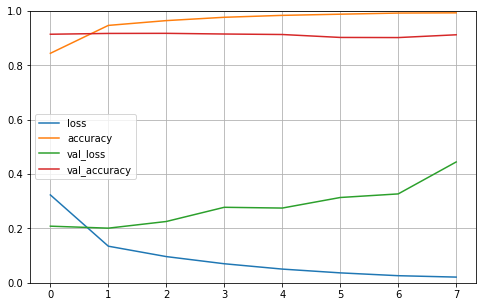

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
Y_pred=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[3080,  339],
       [ 189, 2427]])

In [ ]:
accuracy_score(Y_test,Y_pred)

0.9125103562551782